### 순차데이터
- 텍스트 데이터 (ex : I am a boy) : 순서가 의미가 있다.
- 시계열 데이터 (ex : 1일 10도, 2일 8도)

---
## 순환신경망 (RNN : Recurrent Neural Network)

> 용어 중요!
- IMDB (Internet Movie Data Base)
- IMDB 구성 : Train Data(25000개중 긍정 12500개, 부정 12500개), Test Data(25000개중 긍정 12500개, 부정 12500개)
- NLP : Natural Language Precessing (자연어 처리)
- 말뭉치 : 하나의 데이터셋을 말뭉치라고 표현
- 토큰 : 하나의 단어를 토큰이라고 표현
- 어휘사전 : 번호로 구분된 유일한 단어들의 집단
- 머신러닝이나 딥러닝에서는 데이터가 숫자로 구성되어 있어야 함으로 이런 단어들을 고유헌 번호로 할당하여 사용

In [1]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500) # 25000개의 단어중 500개 단어를 쓰겠다

In [2]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [3]:
# train의 첫번째 문장의 Token갯수
len(train_input[0])

218

In [4]:
len(train_input[1])

189

In [5]:
# 첫번째 댓글 출력
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


- 샘플의 시작부분 토큰은 1을 사용한다.
- 1 : 이제 시작이다.
- 2는 선정한 단어갯수에 포함되지 않는 단어를 표현한다.(500개만 사용한다고 했기 떄문에 500개 안에 없는 단어)
- train_input 자체는 numpy(크기가 같아야하는데)배열이나 댓글에 사용된 토큰수가 다르기때문에 numpy배열을 사용 못하고 python list를 사용한다.

In [6]:
# train 의 traget을 출력
print(train_target[:10])

[1 0 0 1 0 0 1 0 1 0]


- 1 : 좋아요
- 0 : 나빠요

In [7]:
# 훈련세트 준비
from sklearn.model_selection import train_test_split


train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

In [8]:
# 각 리뷰마다 문장 길이를 시각화
import numpy as np
lengths = np.array([len(x) for x in train_input])
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


> 쏠림 현상 파악하기위해 확인하는 작업이며 mean과 median이 근처에 있으면 좋다

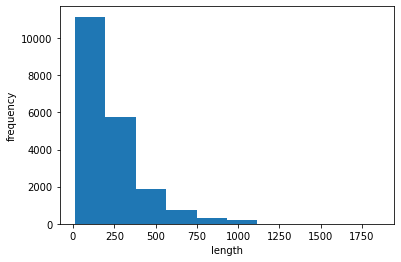

In [9]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel("length")
plt.ylabel('frequency')
plt.show()

### Sequence Padding
- 전체 자릴수를 100으로 가정했을 경우 한분장에 3개 토큰만 있을 경우 나머지 97개는 비워지고 이를 0으로 채우는 과정

In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100) # 위의 차트에서 100개 부분이 제일 많은것 같아 100개의 토큰만 사용
val_seq = pad_sequences(val_input,maxlen=100) # 검증데이터

In [11]:
# 크기 확인
print(train_seq.shape)

(20000, 100)


> 25000개의 훈련세트중 500개는 검증세트로 빠짐

In [12]:
# 첫번쨰 댓글 확인
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [13]:
# 원본의 첫번쨰 댓글의 마지막 10개만 출력
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [14]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


---
# 순환신경망 모델 만들기

In [15]:
import warnings
from tensorflow import keras 

# GPU 사용 설정
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = '1'

warnings.filterwarnings('ignore')

In [16]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500))) # 8 : 셀의갯수 , 500 : 원핫인코딩 을 단어갯수만큼 하겠다.
model.add(keras.layers.Dense(1, activation='sigmoid')) # 긍정어 부정어 뽑는데 sigmoid 를 사용해서 1개만 있어도 됨.

In [18]:
# One hot encoding
train_oh = keras.utils.to_categorical(train_seq)
print(train_oh.shape)

(20000, 100, 500)


In [19]:
# one hot encoding 확인하기 진짜 1이 하나밖에 없어?
print(np.sum(train_oh[0][0]))

1.0


In [20]:
val_oh = keras.utils.to_categorical(val_seq)

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


> Param 은 node + 8(절편) =9  
> 500 * 8 + (8 * 8) + 8(절편) = 4072

In [25]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(
    optimizer=rmsprop, 
    loss='binary_crossentropy', # 2진분류
    metrics ='accuracy'
    ) 

checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/best-simplernn-model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience = 3,
    restore_best_weights = True
)

history = model.fit(
    train_oh,
    train_target,
    epochs=100, # RNN에서 제일 작은게 100임.
    batch_size = 64,  # mini batch 경사하강법 (64(8*8 <- 순환하는 갯수)개씩 가져오겠다.)
    validation_data = (val_oh, val_target),
    callbacks = [checkpoint_cb, early_stopping_cb]
)

Epoch 1/100


2022-07-22 11:26:49.265420: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


313/313 [==============================] - 6s 17ms/step - loss: 0.6972 - accuracy: 0.5053 - val_loss: 0.6954 - val_accuracy: 0.5048
Epoch 2/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6935 - accuracy: 0.5167 - val_loss: 0.6936 - val_accuracy: 0.5148
Epoch 3/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6912 - accuracy: 0.5278 - val_loss: 0.6922 - val_accuracy: 0.5194
Epoch 4/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6892 - accuracy: 0.5361 - val_loss: 0.6910 - val_accuracy: 0.5222
Epoch 5/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6875 - accuracy: 0.5432 - val_loss: 0.6899 - val_accuracy: 0.5324
Epoch 6/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6859 - accuracy: 0.5508 - val_loss: 0.6887 - val_accuracy: 0.5348
Epoch 7/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6842 - accuracy: 0.5569 - val_loss: 0.6875 - val_accuracy: 0.5398
Epoc

In [26]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

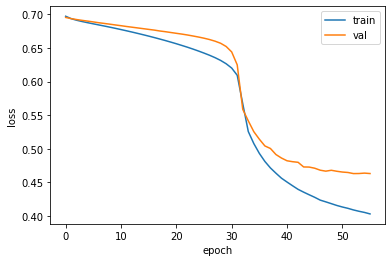

In [27]:
# 시각화 해보기
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

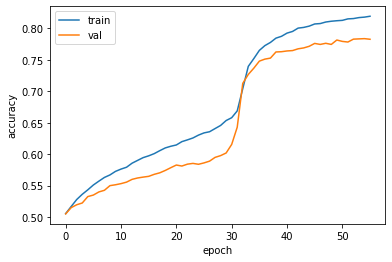

In [28]:
# 시각화 해보기
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

In [29]:
model.evaluate(val_oh, val_target)

157/157 [==============================] - 1s 4ms/step - loss: 0.4629 - accuracy: 0.7830


[0.46294012665748596, 0.7829999923706055]

---
## LSTM(Long Short Term Memory) 신경망 모델 구성하기
- 순환신경망의 셀로 이전 타임스템의 샘플을 기억하고 있음(문장을 알게됨)

In [33]:
model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_length=100)) #Embedding : one hot encoding
model.add(keras.layers.LSTM(8)) # 8개의 셀을 사용한다
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_1 (LSTM)               (None, 8)                 800       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [34]:
# 훈련하기

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(
    optimizer=rmsprop, 
    loss='binary_crossentropy', # 2진분류
    metrics ='accuracy'
    ) 

checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/best-lstm-model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience = 3,
    restore_best_weights = True #
)

history = model.fit(
    train_seq, #Embedding이 들어가있기 때문에 one-hot-encoding
    train_target,
    epochs=100, # RNN에서 제일 작은게 100임.
    batch_size = 64,  # mini batch 경사하강법 (64(8*8 <- 순환하는 갯수)개씩 가져오겠다.)
    validation_data = (val_seq, val_target),
    callbacks = [checkpoint_cb, early_stopping_cb]
)

Epoch 1/100
313/313 [==============================] - 5s 14ms/step - loss: 0.6912 - accuracy: 0.5861 - val_loss: 0.6884 - val_accuracy: 0.6220
Epoch 2/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6670 - accuracy: 0.6205 - val_loss: 0.6396 - val_accuracy: 0.7010
Epoch 3/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6199 - accuracy: 0.7187 - val_loss: 0.6150 - val_accuracy: 0.7206
Epoch 4/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6004 - accuracy: 0.7376 - val_loss: 0.6007 - val_accuracy: 0.7402
Epoch 5/100
313/313 [==============================] - 4s 14ms/step - loss: 0.5860 - accuracy: 0.7473 - val_loss: 0.5892 - val_accuracy: 0.7368
Epoch 6/100
313/313 [==============================] - 4s 14ms/step - loss: 0.5724 - accuracy: 0.7574 - val_loss: 0.5782 - val_accuracy: 0.7538
Epoch 7/100
313/313 [==============================] - 4s 14ms/step - loss: 0.5609 - accuracy: 0.7624 - val_loss: 0.5672 - val_accuracy:

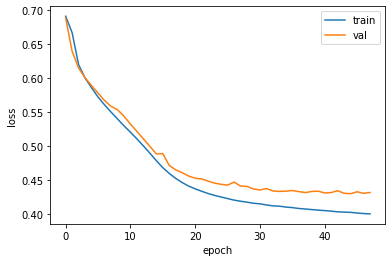

In [35]:
# 시각화 해보기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

> 과대적합이네

In [37]:
model.evaluate(val_seq, val_target)

157/157 [==============================] - 0s 2ms/step - loss: 0.4303 - accuracy: 0.8036


[0.4303184449672699, 0.803600013256073]

---
## 순환층에 드롭아웃 적용하기
- 과대적합 줄이기

In [38]:
model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_length=100)) #Embedding : one hot encoding
model.add(keras.layers.LSTM(8, dropout=0.3)) # 8개의 셀을 사용한다, 드롭아웃 0.3 넣기
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 8)                 800       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [39]:
# 훈련하기

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(
    optimizer=rmsprop, 
    loss='binary_crossentropy', # 2진분류
    metrics ='accuracy'
    ) 

checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/best-lstm-dropout-model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience = 3,
    restore_best_weights = True #
)

history = model.fit(
    train_seq, #Embedding이 들어가있기 때문에 one-hot-encoding
    train_target,
    epochs=100, # RNN에서 제일 작은게 100임.
    batch_size = 64,  # mini batch 경사하강법 (64(8*8 <- 순환하는 갯수)개씩 가져오겠다.)
    validation_data = (val_seq, val_target),
    callbacks = [checkpoint_cb, early_stopping_cb]
)

Epoch 1/100
313/313 [==============================] - 6s 15ms/step - loss: 0.6926 - accuracy: 0.5238 - val_loss: 0.6919 - val_accuracy: 0.5786
Epoch 2/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6903 - accuracy: 0.5970 - val_loss: 0.6883 - val_accuracy: 0.6322
Epoch 3/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6817 - accuracy: 0.6625 - val_loss: 0.6710 - val_accuracy: 0.6876
Epoch 4/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6374 - accuracy: 0.7075 - val_loss: 0.6143 - val_accuracy: 0.7022
Epoch 5/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6013 - accuracy: 0.7125 - val_loss: 0.5907 - val_accuracy: 0.7202
Epoch 6/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5796 - accuracy: 0.7295 - val_loss: 0.5706 - val_accuracy: 0.7320
Epoch 7/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5598 - accuracy: 0.7425 - val_loss: 0.5483 - val_accuracy:

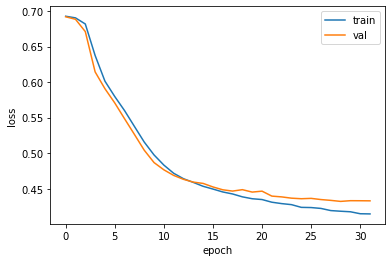

In [40]:
# 시각화 해보기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [41]:
model.evaluate(val_seq, val_target)

157/157 [==============================] - 0s 2ms/step - loss: 0.4321 - accuracy: 0.8018


[0.43208131194114685, 0.801800012588501]

---
# 2개 층을 연결하기
- 모든 타입스텝의 은닉상태를 출력하려면 return_sequences=True 로 하여야한다.

In [42]:
model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_length=100)) #Embedding : one hot encoding
model.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True)) # 여기서 끝난 데이터를 넘겨줘야하기때문에 return_sequences=True 꼭 넣기!
model.add(keras.layers.LSTM(8, dropout=0.3)) # 모든 타입스텝의 은닉상태를 출력하려면 return_sequences=True 로 하여야한다.
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_3 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_4 (LSTM)               (None, 8)                 544       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [43]:
# 훈련하기

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(
    optimizer=rmsprop, 
    loss='binary_crossentropy', # 2진분류
    metrics ='accuracy'
    ) 

checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/best-2lstm-model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience = 3,
    restore_best_weights = True #
)

history = model.fit(
    train_seq, #Embedding이 들어가있기 때문에 one-hot-encoding
    train_target,
    epochs=100, # RNN에서 제일 작은게 100임.
    batch_size = 64,  # mini batch 경사하강법 (64(8*8 <- 순환하는 갯수)개씩 가져오겠다.)
    validation_data = (val_seq, val_target),
    callbacks = [checkpoint_cb, early_stopping_cb]
)

Epoch 1/100
313/313 [==============================] - 10s 25ms/step - loss: 0.6923 - accuracy: 0.5383 - val_loss: 0.6914 - val_accuracy: 0.5556
Epoch 2/100
313/313 [==============================] - 8s 24ms/step - loss: 0.6880 - accuracy: 0.6061 - val_loss: 0.6830 - val_accuracy: 0.6638
Epoch 3/100
313/313 [==============================] - 8s 24ms/step - loss: 0.6623 - accuracy: 0.6755 - val_loss: 0.6225 - val_accuracy: 0.7146
Epoch 4/100
313/313 [==============================] - 8s 24ms/step - loss: 0.5810 - accuracy: 0.7204 - val_loss: 0.5554 - val_accuracy: 0.7288
Epoch 5/100
313/313 [==============================] - 8s 24ms/step - loss: 0.5446 - accuracy: 0.7340 - val_loss: 0.5272 - val_accuracy: 0.7474
Epoch 6/100
313/313 [==============================] - 8s 24ms/step - loss: 0.5233 - accuracy: 0.7490 - val_loss: 0.5076 - val_accuracy: 0.7576
Epoch 7/100
313/313 [==============================] - 8s 24ms/step - loss: 0.5041 - accuracy: 0.7632 - val_loss: 0.4965 - val_accuracy

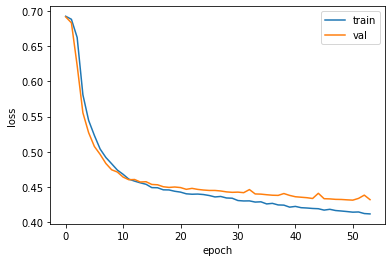

In [44]:
# 시각화 해보기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

---
## GRU(Gated Recurrent Unit) 신경망
- LSTM의 간소화 버전
- 기억하는 횟수를 정해준다

In [45]:
model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_length=100)) #Embedding : one hot encoding
model.add(keras.layers.GRU(8)) # 자동으로 드롭아웃을 해줌
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [46]:
# 훈련하기

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(
    optimizer=rmsprop, 
    loss='binary_crossentropy', # 2진분류
    metrics ='accuracy'
    ) 

checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/best-gru-model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience = 3,
    restore_best_weights = True #
)

history = model.fit(
    train_seq, #Embedding이 들어가있기 때문에 one-hot-encoding
    train_target,
    epochs=100, # RNN에서 제일 작은게 100임.
    batch_size = 64,  # mini batch 경사하강법 (64(8*8 <- 순환하는 갯수)개씩 가져오겠다.)
    validation_data = (val_seq, val_target),
    callbacks = [checkpoint_cb, early_stopping_cb]
)

Epoch 1/100
313/313 [==============================] - 6s 14ms/step - loss: 0.6924 - accuracy: 0.5359 - val_loss: 0.6918 - val_accuracy: 0.5588
Epoch 2/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6908 - accuracy: 0.5742 - val_loss: 0.6900 - val_accuracy: 0.5814
Epoch 3/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6882 - accuracy: 0.5953 - val_loss: 0.6872 - val_accuracy: 0.5914
Epoch 4/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6840 - accuracy: 0.6104 - val_loss: 0.6825 - val_accuracy: 0.5978
Epoch 5/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6774 - accuracy: 0.6202 - val_loss: 0.6752 - val_accuracy: 0.6084
Epoch 6/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6672 - accuracy: 0.6345 - val_loss: 0.6638 - val_accuracy: 0.6202
Epoch 7/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6512 - accuracy: 0.6489 - val_loss: 0.6456 - val_accuracy:

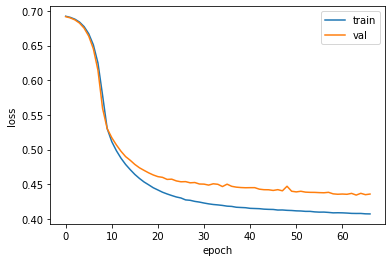

In [47]:
# 시각화 해보기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [48]:
model.evaluate(val_seq, val_target)

157/157 [==============================] - 0s 2ms/step - loss: 0.4345 - accuracy: 0.8006


[0.434482604265213, 0.800599992275238]